# Fundamentals of Machine Learning

## Machine learning regression tasks

Importing modules

In [1]:
import numpy as np #linear algebra
import pandas as pd #dataframes
import sklearn.preprocessing #raw data preprocessing
import sklearn.model_selection #grid search + cross validation
import sklearn.ensemble #random forest
import sklearn.linear_model #linear regression
import sklearn.svm #support vector machines
import sklearn.neural_network #multilayer perceptron
import sklearn.neighbors #k-nearest neighbors
import sklearn.tree #decision tree
import matplotlib.pyplot as plt #visualization

Reading the data from a csv file and saving it into a dataframe

In [2]:
data = pd.read_csv('exampleObesityClassReg.csv')

### Data Preprocessing

Data exploration

In [3]:
data.sample(10)

,country_name,continent,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
63,United Kingdom,Europe,0.246701,3,2175.033333,44816.100000,32313.366670,15679.666670,8744.866667,13525.233330,...,1025.100000,95073.900000,9369.633333,6384.600000,7785.766667,421.833333,669.700000,24986.233330,44291.433330,116990.300000
56,Azerbaijan,Europe,0.240098,3,0.000000,3236.866667,4725.200000,343.100000,3745.800000,4686.166667,...,337.733333,14379.300000,7252.900000,2631.233333,2511.333333,125.566667,140.000000,16605.200000,35717.366670,26402.433330
78,Saudi Arabia,Asia,0.353288,3,0.000000,7585.900000,2002.700000,49.400000,36049.966670,4214.800000,...,883.433333,25288.800000,17797.366670,3494.833333,1400.600000,229.533333,143.700000,11653.466670,82370.600000,45401.133330
6,Pakistan,Asia,0.059085,1,0.000000,21.300000,21.166667,1.733333,1102.900000,96.066667,...,76.700000,4773.133333,8.333333,142.600000,182.600000,12.166667,10.066667,2664.633333,2006.133333,4857.600000
36,Ukraine,Europe,0.197482,2,2187.633333,4699.100000,8630.866667,2056.900000,4740.633333,7664.400000,...,629.400000,11218.566670,6515.633333,7352.133333,1701.400000,110.500000,499.666667,13883.366670,34833.566670,26400.000000
45,Latvia,Europe,0.214695,2,6871.133333,7628.333333,13857.633330,2921.966667,7736.666667,12584.500000,...,330.966667,56502.766670,17664.500000,14065.733330,3519.433333,179.700000,559.166667,26338.800000,37478.633330,88511.133330
5,China,Asia,0.054962,1,13.500000,489.533333,2108.066667,372.500000,7443.766667,5789.666667,...,225.633333,9707.733333,1889.800000,48.933333,2173.500000,77.466667,33.600000,5639.366667,6677.033333,10232.666670
24,Netherlands,Europe,0.171413,1,906.333333,24005.733330,15575.700000,7125.166667,7408.566667,14069.700000,...,1580.533333,57248.033330,33144.333330,28622.433330,5828.233333,575.833333,937.133333,25961.800000,54165.833330,112733.200000
8,Philippines,Asia,0.064357,1,49.300000,1036.266667,3804.533333,122.300000,3629.400000,2680.766667,...,593.266667,2673.333333,528.166667,1094.933333,553.166667,67.300000,57.100000,6523.700000,4945.600000,4197.366667
31,Belgium,Europe,0.186661,2,392.333333,30208.200000,19078.066670,9102.933333,9166.500000,10279.066670,...,2439.633333,68413.300000,15318.966670,13231.933330,5340.300000,654.500000,690.033333,28023.700000,51698.566670,106396.266700


Describing the prevalence

In [4]:
data.prevalence.describe()

count    79.000000
mean      0.195593
std       0.080271
min       0.016048
25%       0.163696
50%       0.206130
75%       0.241439
max       0.353288
Name: prevalence, dtype: float64

Exploring the distribution of the labels

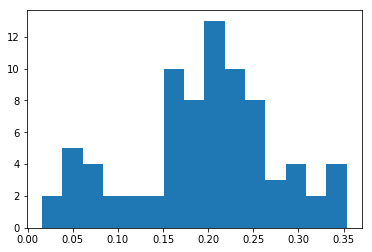

In [5]:
plt.hist(data.prevalence,bins=15)
plt.show()

Describing the shape of the dataframe

In [6]:
data.shape

(79, 52)

Creating a variable which only contains the predictor features

In [7]:
features = data[data.columns.difference(['prevalence','tertile','country_name','continent'])]

Saving the feature names into a variable

In [8]:
feature_names = features.columns

Visualizing the features

In [9]:
features.sample(3)

,Baby Food,Baked Goods,Beer,Bottled Water,Breakfast Cereals,Butter and Margarine,Carbonates,Cheese,Chocolate Confectionery,Cocoa Powder,...,Sports and Energy Drinks,Spreads,Starchy Roots,Sugar Confectionery,Sugar and Sweeteners,"Sweet Biscuits, Snack Bars and Fruit Snacks",Tea,Vegetables,Wine,Yoghurt and Sour Milk Products
50,180.200000,72835.73333,24399.10000,60169.233330,650.766667,2934.533333,60260.23333,3600.300000,1321.166667,299.7,...,198.766667,999.666667,47469.46667,1817.933333,45653.80000,4045.333333,153.266667,91141.60000,25209.1333,9226.100000
30,250.033333,25355.56667,32819.76667,5581.333333,366.700000,900.933333,48174.36667,1231.833333,291.533333,107.2,...,503.700000,323.033333,78419.56667,811.500000,31995.83333,1354.166667,139.166667,24956.96667,517.0667,2183.066667
36,629.400000,49904.03333,61213.36667,37371.933330,445.533333,3478.600000,34297.03333,3975.400000,3858.000000,110.5,...,241.900000,312.833333,108720.56670,2686.966667,25197.23333,3536.533333,468.466667,117751.00000,7940.1000,6515.633333


Creating a variable of the numerical labels of the dataset

In [10]:
labels_numerical = data.prevalence

Normalizing the numerical variables into a min max scaler where the maximum value is transformed into a 1 and the minimum value is 0

In [11]:
minMaxScaler = sklearn.preprocessing.MinMaxScaler()
features = minMaxScaler.fit_transform(features)

Checking if the range of the values is between 0 and 1

In [12]:
features[:1,:]

array([[1.03185572e-01, 1.33818127e-03, 1.09283215e-01, 1.49233599e-02,
        0.00000000e+00, 3.05246906e-03, 1.69307795e-02, 1.84287043e-03,
        3.35912234e-03, 3.22430631e-02, 6.25161770e-02, 1.95383271e-04,
        2.40807285e-02, 1.34124650e-01, 8.86528758e-02, 1.42828672e-03,
        9.25111471e-02, 2.12577881e-01, 1.51973811e-02, 3.83042097e-01,
        1.02277989e-01, 1.04349473e-02, 8.94231364e-03, 3.92787984e-01,
        2.35873654e-02, 8.23362026e-01, 4.57720111e-02, 1.29546406e-02,
        1.79410705e-03, 1.01928756e-02, 1.15803603e-01, 0.00000000e+00,
        3.52686069e-03, 5.51678163e-02, 1.21884279e-01, 3.08558548e-02,
        0.00000000e+00, 8.63255982e-03, 8.28225925e-02, 0.00000000e+00,
        3.55299793e-01, 5.99909253e-02, 1.22368333e-01, 3.11179893e-02,
        5.75844010e-02, 6.57770121e-01, 6.06134921e-03, 2.39244174e-02]])

Splitting the data into training and testing subsets

In [13]:
features_train, features_test, labels_numerical_train, labels_numerical_test = sklearn.model_selection.train_test_split(
    features,
    labels_numerical,
    test_size=0.30,
    random_state = 55
)

In [14]:
features_train

array([[3.10005874e-02, 1.98881520e-01, 3.32067154e-02, ...,
        1.42468362e-01, 1.20271631e-02, 1.56250255e-01],
       [5.87793249e-02, 5.59400214e-01, 4.36056485e-01, ...,
        9.76227321e-01, 1.39791102e-01, 4.99897972e-01],
       [4.12362229e-02, 5.49619709e-02, 2.59055740e-01, ...,
        1.55432033e-01, 1.23388777e-02, 1.46251479e-02],
       ...,
       [3.42880835e-01, 3.97060010e-01, 5.14808573e-01, ...,
        2.50535117e-01, 4.33482751e-01, 3.20884790e-01],
       [8.27315759e-02, 6.62700246e-01, 1.37732071e-02, ...,
        5.41375111e-01, 2.70145690e-02, 1.88936049e-01],
       [2.40299900e-02, 4.09165363e-01, 7.62634182e-03, ...,
        8.41336885e-01, 9.33748442e-04, 7.06493082e-02]])

### Machine Learning Data Analysis

Training a linear regression model

In [15]:
regressor = sklearn.linear_model.LinearRegression()

In [16]:
regressor.fit(features_train,labels_numerical_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Printing the coefficients of each feature

In [17]:
regressor.coef_

array([ 0.16677324, -0.35906334,  0.03765829, -0.00785051, -0.04918158,
        0.06337703,  0.16007784, -0.18941514,  0.06405334, -0.30994365,
       -0.070123  , -0.07786633, -0.52686665, -0.16103048, -0.10058087,
        0.04266822,  0.31223977,  0.01970688,  0.24363222, -0.21940706,
        0.00305268,  0.0564445 , -0.05077532,  0.25046921,  0.85479572,
       -0.14173477, -0.04803398, -0.0340297 , -0.36134998,  0.14881112,
        0.44305301, -0.10840107, -0.07486004, -0.02140524, -0.03044997,
        0.04409911,  0.32655928, -0.05034695, -0.05027414,  0.08651873,
       -0.13958739,  0.12765063, -0.00630166, -0.12305165,  0.08047724,
       -0.04569768,  0.18668161, -0.27430608])

Printing the intercept of the linear model

In [18]:
regressor.intercept_

0.12451923906612508

Making predictions over the testing subset

In [19]:
predictions = regressor.predict(features_test)

In [20]:
pd.DataFrame(list(zip(labels_numerical_test,predictions)),columns=['true','predicted']).sample(5)

,true,predicted
3,0.059085,0.349609
8,0.155723,0.166431
16,0.044837,0.117306
9,0.165021,0.302789
10,0.197482,0.136768


Calculating the mean absolute error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n}\left | y_{i} - \hat{y}_{i} \right |$$

In [21]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.12506414047167178

Calculating the root mean squared error
$$RMSE = \sqrt {\frac{1}{n}\sum_{j=1}^{n}\left ( y_{i} - \hat{y}_{i} \right )^{2}}$$

In [22]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.15151306109587892

Calculating the r-squared statistic

In [23]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

-1.8306388392558435

### Random Forest Regressor

Training a random forest regressor with 100 trees

In [24]:
regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=15)

In [25]:
regressor.fit(features_train,labels_numerical_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=15, verbose=0,
                      warm_start=False)

Predicting the labels from the test features subset

In [26]:
predictions = regressor.predict(features_test)

In [27]:
summary = pd.DataFrame(list(zip(data.country_name,labels_numerical_test,predictions)),columns=['country','true','predicted'])
summary['AE'] = abs(summary.true - summary.predicted)
summary = summary.sort_values(by='AE',ascending=True)

Calculating MAE

In [28]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.047429547056249986

Calculating RMSE

In [29]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.06232385596461852

Calculating r-squared

In [30]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

0.5210469462202856

Exploring the absolute errors by country that are in the testing dataset

In [31]:
summary

,country,true,predicted,AE
11,Taiwan,0.083790,0.083843,0.000053
6,Pakistan,0.254970,0.253157,0.001814
22,Uzbekistan,0.245770,0.248652,0.002883
7,Singapore,0.212405,0.219636,0.007231
2,Japan,0.241884,0.253040,0.011156
4,Indonesia,0.046816,0.064171,0.017354
15,Malaysia,0.240199,0.221080,0.019119
9,Nigeria,0.165021,0.194351,0.029331
1,India,0.070481,0.100898,0.030417
10,Republic of Korea,0.197482,0.233759,0.036278


Plotting the absolute errors by country, sorted by absolute error

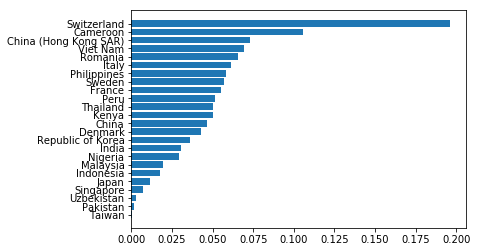

In [32]:
plt.barh(summary.country,summary.AE)
plt.show()

Extracting the variable importance list from the random forest regressor

In [33]:
vil = pd.DataFrame(list(zip(feature_names,regressor.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [34]:
vil.head()

,feature,mean_gini_decrease
18,Flours,0.216724
1,Baked Goods,0.198426
30,Pulses,0.095162
25,Nuts,0.077482
10,Coffee,0.055321


Plotting the variable importance list sorted by the mean decrease gini

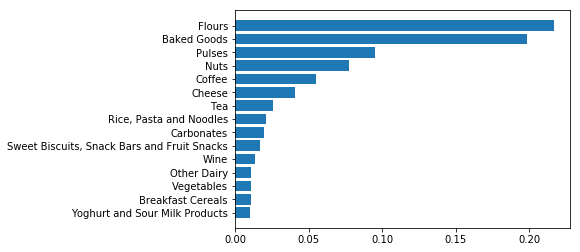

In [35]:
ax = plt.barh(data = vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

Averaging the VIL from 50 random forest runs

In [36]:
rf_vil  = []
for i in range(50):
    rf = sklearn.ensemble.RandomForestRegressor(n_estimators=100)
    rf = rf.fit(features_train,labels_numerical_train)
    rf_vil.append(rf.feature_importances_)
mean_vil = np.mean(rf_vil, axis = 0)

In [37]:
mean_vil = pd.DataFrame(list(zip(feature_names,mean_vil)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [38]:
mean_vil.head()

,feature,mean_gini_decrease
1,Baked Goods,0.210766
18,Flours,0.166201
25,Nuts,0.106505
30,Pulses,0.095433
10,Coffee,0.051575


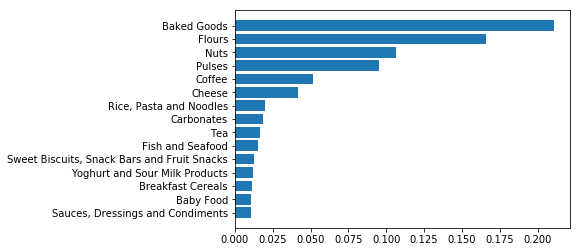

In [39]:
ax = plt.barh(data = mean_vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )
plt.show()

### Constructing a cross-validated estimator to predict over all countries

In [40]:
regressor = sklearn.ensemble.RandomForestRegressor(n_estimators=100, random_state=15)

Training a estimator using the entire dataset but using cross validation to empower the generalization

In [41]:
predictions = sklearn.model_selection.cross_val_predict(regressor, features, labels_numerical)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [42]:
summary = pd.DataFrame(list(zip(data.country_name,labels_numerical,predictions)),columns=['country','true','predicted'])
summary['AE'] = abs(summary.true - summary.predicted)
summary = summary.sort_values(by='AE',ascending=True)

In [43]:
summary

,country,true,predicted,AE
37,Morocco,0.199042,0.198994,0.000048
52,Kazakhstan,0.236503,0.236439,0.000064
43,Germany,0.211409,0.211617,0.000208
35,Norway,0.196593,0.196343,0.000250
31,Belgium,0.186661,0.186956,0.000295
40,Guatemala,0.206170,0.206539,0.000369
41,Georgia,0.209004,0.206802,0.002201
30,Bolivia,0.185507,0.175135,0.010372
45,Latvia,0.214695,0.225184,0.010489
33,Finland,0.195756,0.183934,0.011823


Plotting the absolute errors by country, sorted by absolute error

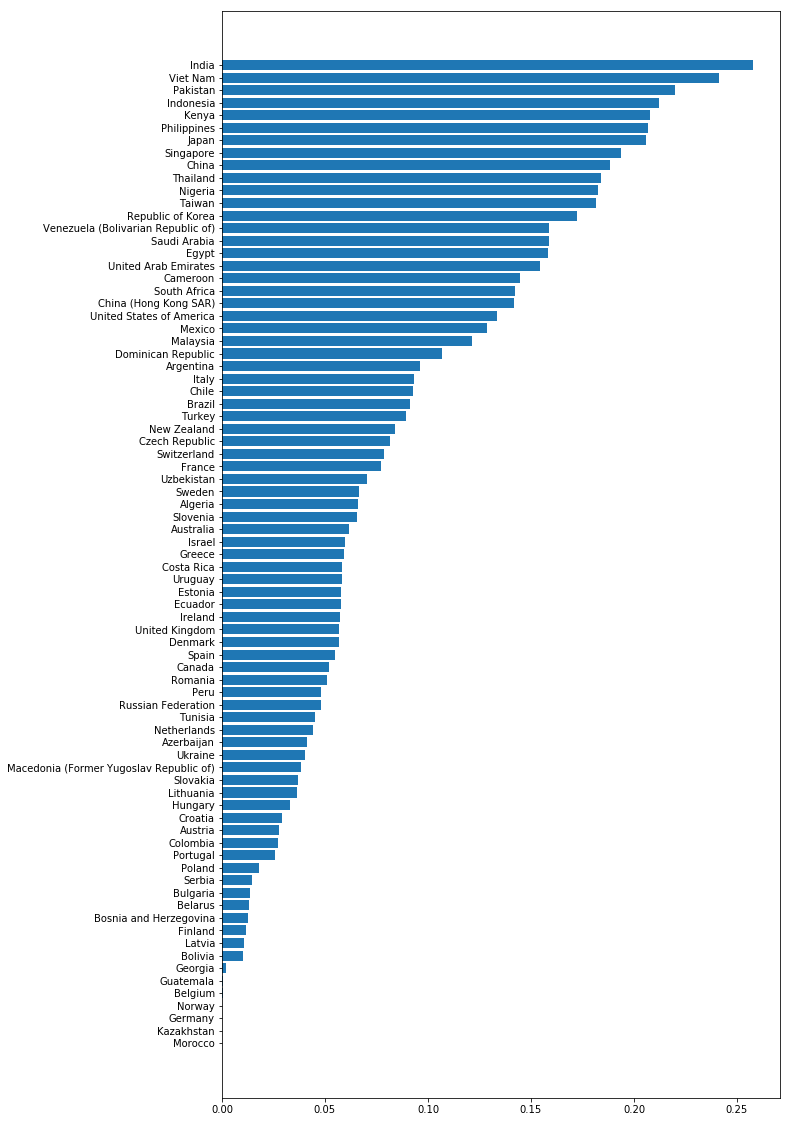

In [44]:
plt.figure(figsize=(10,20))
plt.barh(summary.country,summary.AE)
plt.show()

### Comparison Between Diferent Machine Learning Models and Hyperparameters

Selecting some machine learning training algorithms, training each one and using cross validation to retrieve their performance

In [45]:
models = []

models.append(("LinearRegression",sklearn.linear_model.LinearRegression()))
models.append(("SVR",sklearn.svm.SVR()))
models.append(("RandomForest",sklearn.ensemble.RandomForestRegressor()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsRegressor()))
models.append(("MLPRegressor",sklearn.neural_network.MLPRegressor()))
models.append(("DecisionTreeRegressor",sklearn.tree.DecisionTreeRegressor()))


results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             features, 
                             labels_numerical,  
                             cv=10, 
                             scoring='neg_mean_absolute_error',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

List of compared models along with their hyperparameters

In [46]:
models

[('LinearRegression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
      gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
      tol=0.001, verbose=False)),
 ('RandomForest',
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators='warn',
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)),
 ('KNeighbors',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')),
 ('MLPR

Box plot of the results (negative mean absolute error) of each model

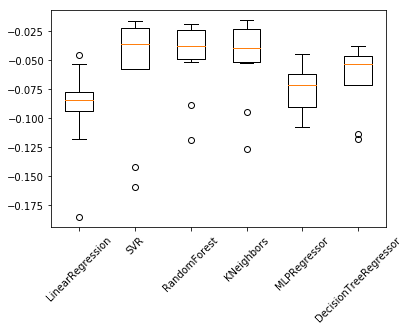

In [47]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)
plt.show()

In [48]:
##########

#compare the models based on other metric

##########

Grid search for selection of the best hyperparameters

In [49]:
# # HIGH PROCESSOR INTENSIVE TASK (~5 minutes calculations of a 12 cores machine)

# parameters = {'n_estimators': list(range(260,360,20)),
#               'max_features': ['auto', 'sqrt'],
#               'max_depth': list(range(20,100,20))+[None],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'bootstrap': [True, False]
# }
# grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(), 
#                                                    parameters, 
#                                                    n_jobs=-1,
#                                                    cv = 3,
#                                                    scoring = 'neg_mean_squared_error'
#                                                   )

# grid_Search.fit(features_train,labels_numerical_train)

In [50]:
#low intensive grid search
parameters = {'n_estimators': [100,150,200]
}
grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(), 
                                                   parameters, 
                                                   n_jobs=-1,
                                                   cv = 3,
                                                   scoring = 'neg_mean_absolute_error'
                                                  )

grid_Search.fit(features_train,labels_numerical_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200]},

The best hyperparameters extracted from the grid search

In [51]:
grid_Search.best_params_

{'n_estimators': 150}

The result of each run of the grid search

In [52]:
pd.DataFrame(grid_Search.cv_results_).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076462,0.000940,0.003657,4.700779e-04,100,{'n_estimators': 100},-0.035935,-0.057895,-0.042729,-0.045346,0.009186,3
1,0.114360,0.008554,0.006316,4.699655e-04,150,{'n_estimators': 150},-0.036924,-0.056616,-0.042367,-0.045150,0.008303,1
2,0.141621,0.003257,0.004987,1.946680e-07,200,{'n_estimators': 200},-0.036374,-0.058806,-0.040903,-0.045198,0.009672,2


Making predictions over the test subset using the best model from the grid search

In [53]:
predictions = grid_Search.predict(features_test)

Summary of the results

In [54]:
pd.DataFrame(list(zip(labels_numerical_test,predictions)),columns=['true','predicted']).sample(5)

,true,predicted
22,0.245770,0.244607
23,0.046494,0.118064
21,0.263871,0.212959
11,0.083790,0.080931
14,0.192777,0.259911


MAE

In [55]:
sklearn.metrics.mean_absolute_error(labels_numerical_test,predictions)

0.04860078593002646

RMSE

In [56]:
sklearn.metrics.mean_squared_error(labels_numerical_test,predictions)**0.5

0.06296650654550791

R-squared

In [57]:
sklearn.metrics.r2_score(labels_numerical_test,predictions)

0.5111186006163178

In [58]:
##########

#make your own grid search for other training algorithm

##########